
## Reinforcement Learning
## Project: Train a Smartcab to Drive


-----

## Getting Started
In this project, I will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, I will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

describe what I observe during the simulation when running the default `agent.py` agent code. Some things you could consider:


1>Smartcab is standstill during the simulation. 

2>Rewards is number with 2 decimal places.

3>The driving agent receive positive number when the light is red.

4>The driving agent recieve negtive number when the light is green.

### Code example

**1> **
    # Create the environment
    # Flags:
    #   verbose     - set to True to display additional output from the simulation
    #   num_dummies - discrete number of dummy agents in the environment, default is 100
    #   grid_size   - discrete number of intersections (columns, rows), default is (8, 6)
    env = Environment(num_dummies = 20, grid_size = (6,5))
  I choose two flags of enviroment. I set num_dummies to 8. Obviously, there are only 20 cars on map. I give (6,5) to grid_size. Columns change to 6. Row change to 5.
  
  
    # reate the simulation
    # Flags:
    #   update_delay - continuous time (in seconds) between actions, default is 2.0 seconds
    #   display      - set to False to disable the GUI if PyGame is enabled
    #   log_metrics  - set to True to log trial and simulation results to /logs
    #   optimized    - set to True to change the default log file name
    sim = Simulator(env, update_delay = 5.0)
  I change update_delay to 5.0. The informantion of Smartcab is collected and outputted every 5 seconds. 
  
**2>** The 'act()' function is called when an agent performs an action.

**3>** The difference between these two functions is form of results. In 'render_text()' function, Simulated trial data will be rendered in the terminal/command prompt. In 'render()' function, the result of simulation is the GUI render display.

**4>** The 'next_waypoint()' function consider the East_West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. 

### Basic Agent Simulation Results
To obtain results from the initial simulation
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.


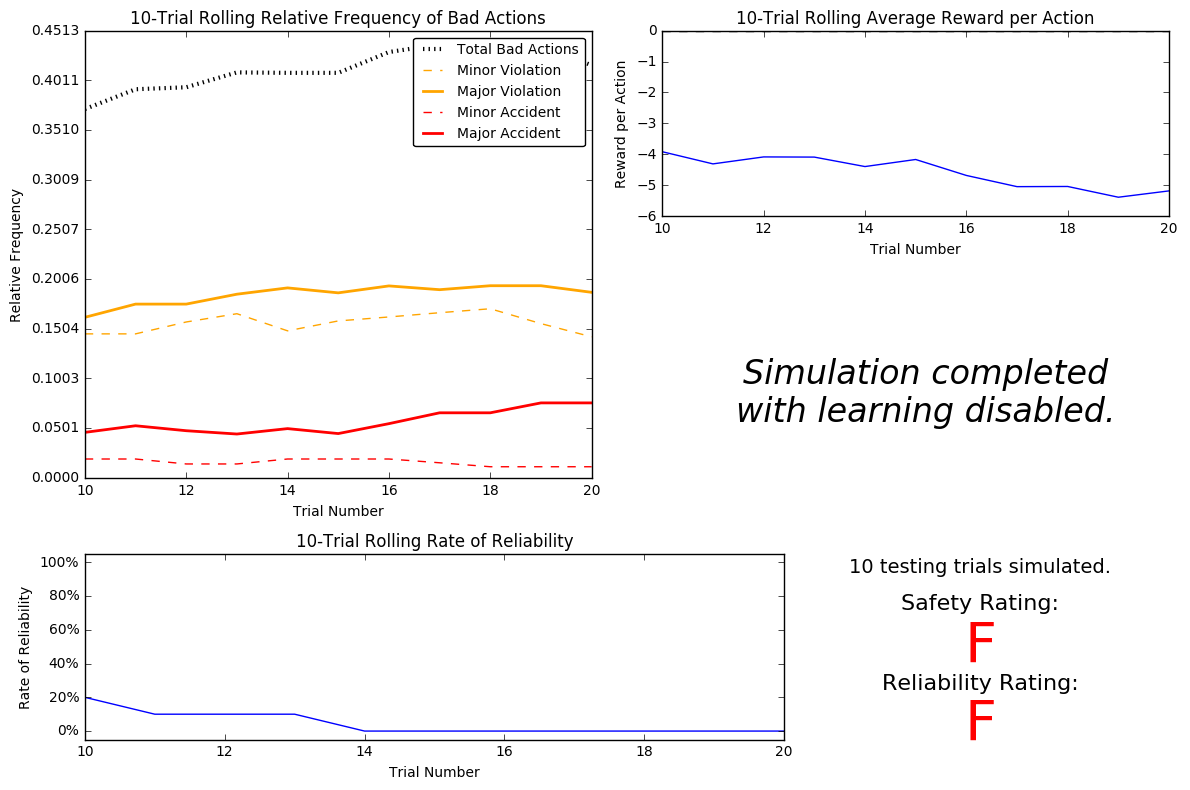

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')


**1>**  Relative frequence of bad decisions is around 0.42. There are 12 percent of bad decisions causing accidents.

**2>**  Given that the agent is driving randomly, This rate of reliability make sense.

**3>** Average reward is negtive score. They are around -5 and suggest it has been penalized heavily.

**4>** Relative frequence of bad actions and Average reward doesn't change significantly as the number of trials increases. Relative frequence of bad actions is around 0.42. Average reward pre action is around -5.

**5>** This Smartcab isn't safe and reliable for its passengers. 

       - The grade of safety is F. It means that This Smartcab at least one major accident, such as driving through a red    light with cross-traffic

       - The grade of reliability is F. Obviously， F is the lowest grade. This smartcab fails to reach the destination on   time for at least 60% of trips.



-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.


**There five features most relevant for learning both safety and efficiency. They are 'waypoint', 'light', 'left'. and 'oncoming'.**

The 'waypoint' feature provid us the direction the Smartcab should drive leading to the destination. It let smartcab learn efficiency. Smartcab could go this way first. This feature is relative to efficiency. 

The 'light' feature is relative to safety  which we know in organized traffic. It prevent the Smartcab from doing accident. 

The 'left' feature is relative to safety. The smartcab need to make sure that on vehicle is present on its left, when it would turn right on a red light at a intersection . 


The 'oncoming' feature is relative to safety. The smartcab need make sure there is no oncoming traffic, when it would turn left on a green light and turn right on a red light at intersection. 




**I haven't choose 'deadline' and 'right'. **

The 'right' feature isn't relative to safety. In project, the map is two-way two-line road. There is no vehicle  on smartcab's right. According to definitions of project, firstly, On a red light, a right turn is permitted if no oncoming traffic is approaching from car's left through the intersection. Second,  there will be no pedestrians to be concerned with. The 'right' feature is not necessary.
              

The 'deadline' feature is parameter which cann't derectly improve safety and efficiency.




### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.


If a state is defined using the features you've selected from above

I have chosen four features. They are 'waypoint', 'light', 'left','right' and 'oncoming'. The size of the state space would be 4.

If 'light' is 'green':

1>(action is farword) Smartcab should go straight.

2>(action is right)  Smartcab should turn right.

3>(action is left) Smartcab should check traffic situation using 'oncoming' feature. If 'oncoming' and 'left' are 'None' which means there is no oncoming traffic making a right turn or coming straight through the intersection. Smartcab could turn left.

4>(action is left) Smartcab should check traffic situation using 'oncoming' feature. If 'oncoming' or 'left' isn't  'None' which means  there is no oncoming traffic making a right turn or coming straight through the intersection., Smartcab should keep stop.



If 'light' is 'red':

(action is farword or left) Smartcab should stop and check next status of 'light'.

(action is right) Smartcab should stop and check traffic situation using 'oncoming' feature. If 'oncoming' isn't 'None', Smartcab should keep stop.

(action is right) Smartcab should stop and check traffic situation using 'oncoming' feature. If 'oncoming' is 'None', Smartcab could slowly pull ahand. Now, If 'left'  is 'None', Smartcab could turn right.

(action is right) Smartcab should stop and check traffic situation using 'oncoming' feature. If 'oncoming' is 'None', Smartcab could slowly pull ahand. Now, If 'left'  isn't 'None', Smartcab should stop.

'waypoint' feature have 3 values
'light' feature have 2 values
'left' feature have 4 values
'right' feature have 4 values


3 × 2 × 4 × 4   = 96

There are 96 kinds of state.

I think the driving agent could learn a policy for each possible state with a reasonable number of training trials.




-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use my -Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$


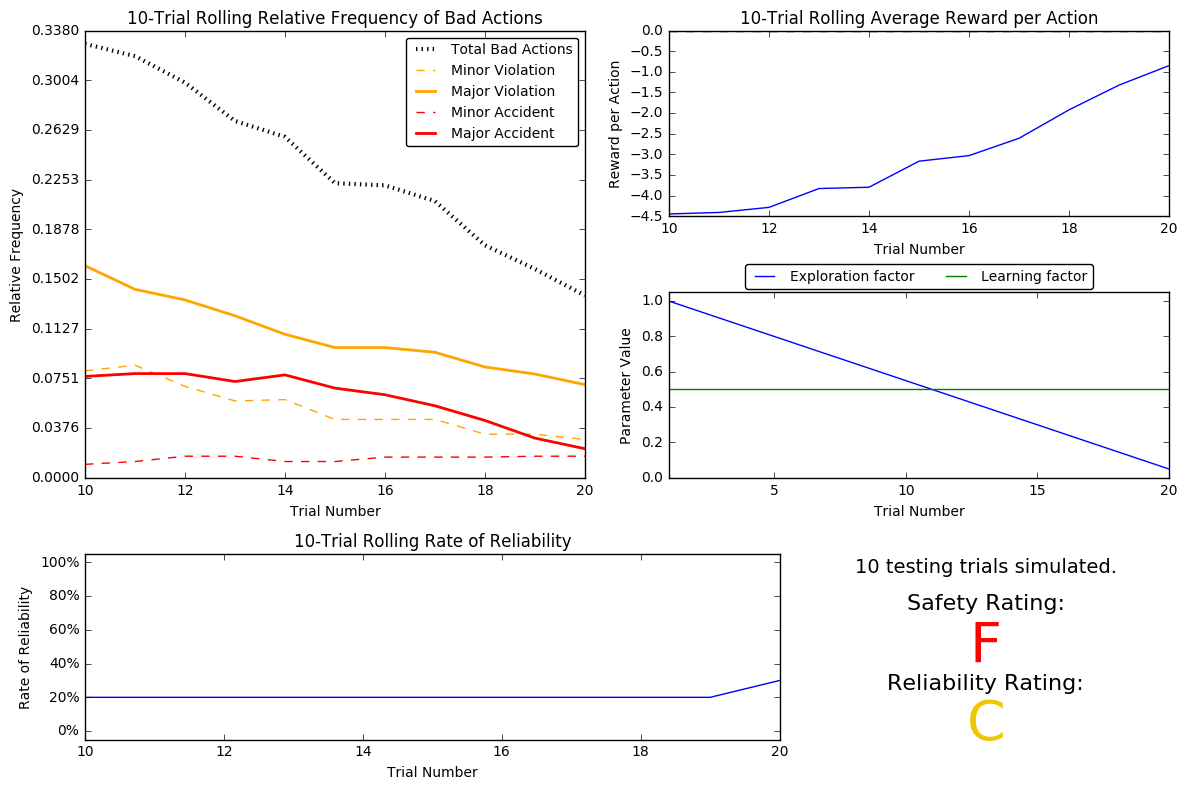

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

**Answer:**

1> The frequency of minior accident is similar with basic driving agent.

2> there are 20 trials as we see on the x axis of the visualizations

3>Exploration factor represented in the parameters panel. There is blue line on trialNumber-parameterValue coordinate plane

4>The number of bad actions decrease as the number of training trials increased.
The average reward increase as the number of training trials increased.
The rate of reliability increase as the number of training trials increased.

5>The degree of safety is F and the degree of reliability is C. The reliability is improve obviously. But the driving agent need more trials to learn.



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.


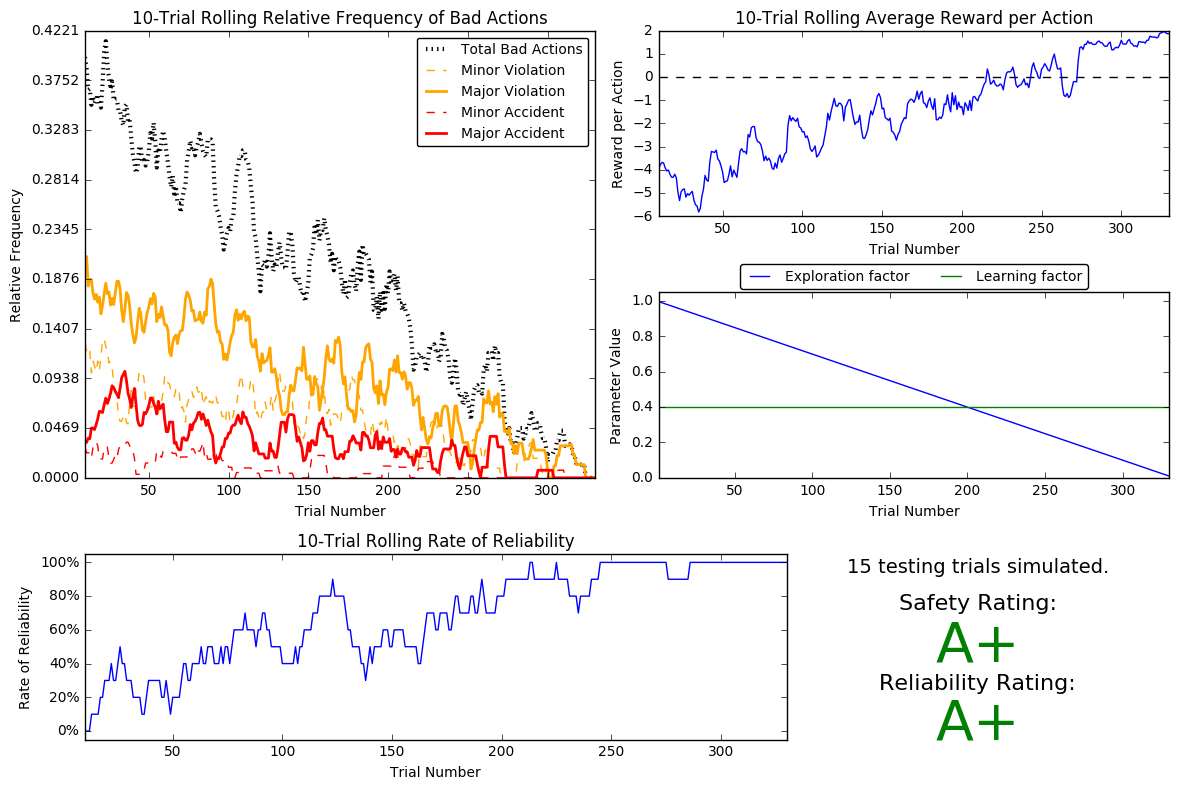

In [25]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

**Answer:**

1>  I use the decaying function: 

                                             self.epsilon = self.epsilon - 0.003

2>State has 'waypoint', 'light', 'left' ,'right'and 'oncoming'. There are 96 kinds of state. In addition, action has 4 choice.  So there are 384 kinds of (state, action) pair. According to Coupon collector's problem. Q-Learning agent need creating 2285 steps to collect all (state, action) pairs. From command prompt, I know that Average step of one trial is 20 , The average epsilon is 0.475, It's mean that aound 10 steps we can random choose in one trial. So, we need 229 trials at least.  The epsilon-tolerance decide the amount of trial . I plan to train around more than trials before begining testing.

3>epsilon-tolerance is 0.003. The amount of trials should be more than 229 using this tolerance.  the alpha is 0.4. I tried different alpha . This one is the best which can preduce high grede for testing.

4>The bad actions decrease significantly as the number of training trials increased. . The rate of reliability and Rewards increase significantly as the number of training trials increased . The average rewards is bigger than 0 at end of training process.

5> According the Q-learn results, The driving agent successfully learned an appropriate policy.

6>The degree of safety is A+. The degree of reliability is A+. I am satisfied with the safety and reliability ratings of the smartcab.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, I can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, I can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to my advantage for verifying whether the **policy** my driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

optimal policy 
                                                             optimal policy
                                            ============================================
                                           |'waypoint','light','left','oncoming'| action | 
                                            =============================================
                                           |  not'right',red  ,  None ,  None   |  None  |
                                           ----------------------------------------------
                                           |   right  ,  red ,   None ,   None  |  right |
                                           ----------------------------------------------
                                           |   ---    ,  red ,not None,   None  |  None  | 
                                           ----------------------------------------------
                                           |   ---    ,  red ,   None , not None|  None  | 
                                            ---------------------------------------------
                                           |   ---    ,  red ,not None, not None|  None  | 
                                            ---------------------------------------------
                                           |   right  ,  green ,  None ,  None  | right  |
                                            ---------------------------------------------
                                           |   left   ,  green  , None ,  None  |  left  |
                                            ---------------------------------------------
                                           |   forward,  green  , None ,  None  |forward |
                                           ----------------------------------------------
                                           |     ---  ,  green  , None ,not None|forward |
                                            ---------------------------------------------
                                           |     ---  ,  green  , not None, None|forward |
                                            ---------------------------------------------
                                           |     ---  ,  green,not None,not None|forward |
                                            =============================================
                                            
* ' --- ' means one of (left,right,forward,None) in table.
                                           
Some cases:

1> The policy isn't correct for every state. I see that 'right' action get highest reward. They are different with my optimal policy. The 'forward' action should be optimal policy which has highest positive value on this state.

('left', 'green', 'right', 'forward')
 -- forward : 0.37
 -- None : -2.17
 -- right : 0.70
 -- left : 0.67

2>
This state demonstrate the optimal policy. When the light is 'green' with two 'not None' and 'waypoint' is 'right', 'right' action should be the optimal policy which received highest positive rewards

('right', 'green', None, None)
 -- forward : 0.70
 -- None : -5.00
 -- right : 2.15
 -- left : 0.60

This state demonstrate the optimal policy. When the light is 'red' with two 'not None', 'None' action should be the optimal policy which received highest positive rewards

('left', 'red', 'right', 'left')
 -- forward : -3.98
 -- None : 2.62
 -- right : 0.45
 -- left : -8.03


3>
This entry have not learn the optimal policy.           

('right', 'red', 'right', 'left')
 -- forward : -13.11
 -- None : 0.46
 -- right : 2.13
 -- left : -3.91

 
When the light is 'red' with  'right' and 'left',  The optimal policy should be 'forward'. On q table, The 'right' action give us highest value for this state. The reason of this mistake is act()function which provide reward. When action is 'right', if light isn't green and 'left' is 'forward', cab would receive violation. In this state ('right', 'red', 'right', 'left'), left is right, So cab won receive negtive reward.

                                           
                                           

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, I haven't use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!


The one characteristic is that Our environment is deterministic. This policy should be under the traffic law. The utility of next (state, action) pair cann't influence decision for current state. In other words, the utility of current (state, action) pair doesn't depend on the next. Only the reward of exploration should be consider and put into Q value of the (state,action).

The other characteristic is that the driving agent doesn't do the action of (state, action) pair which be chose in choose_action() function and get next state. in update()function, The real next state  be create by build_state() function. Using simulated annealing method get epsilon and then pick action for learning.